In [126]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

In [31]:
df = pd.read_csv('lemonade.csv', parse_dates=['Date'], index_col='Date')

# Exercises

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [32]:
df.columns

Index(['Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [130]:
df_nums = df[['Temperature', 'Rainfall', 'Flyers', 'Sales']]

## Create Lower and Upper Fences

In [131]:
Q1 = df_nums.quantile(.25)

In [132]:
Q3 = df_nums.quantile(.75)

In [62]:
IQR = Q3 - Q1

In [79]:
lowers = Q1 - IQR * 1.5
lowers

Temperature    16.70
Rainfall        0.26
Flyers          4.00
Sales           5.00
dtype: float64

In [107]:
uppers = Q3 + IQR * 1.5
uppers

Temperature    104.7
Rainfall         1.3
Flyers          76.0
Sales           45.0
dtype: float64

## Explore Temp 

In [109]:
df[df['Temperature'] <= lowers[0]], df[df['Temperature'] >= uppers[0]]

(               Day  Temperature  Rainfall  Flyers  Price  Sales
 Date                                                           
 2017-12-31  Sunday         15.1       2.5       9    0.5      7,
                  Day  Temperature  Rainfall  Flyers  Price  Sales
 Date                                                             
 2017-02-11  Saturday        212.0      0.91      35    0.5     21)

In [115]:
df.Temperature.value_counts().sort_index(ascending=False)

212.0    1
102.9    1
102.6    1
99.6     1
99.3     2
98.0     1
97.9     1
94.3     1
93.4     1
93.0     2
92.0     1
91.7     1
90.7     1
90.4     1
89.4     1
89.1     1
87.4     1
86.8     1
86.5     3
85.5     1
85.1     2
84.8     2
84.2     2
83.8     1
83.5     2
83.2     1
82.5     2
81.5     2
80.9     1
80.5     2
        ..
40.5     2
40.4     2
39.5     1
38.2     1
38.1     2
37.8     1
37.5     2
36.8     1
36.2     1
35.8     2
35.5     2
35.2     1
34.9     2
34.5     1
33.5     2
32.9     1
32.6     1
32.2     4
31.9     1
31.6     1
31.3     1
31.2     1
30.9     3
30.6     1
28.9     2
28.6     1
27.0     1
25.3     1
22.0     1
15.1     1
Name: Temperature, Length: 176, dtype: int64

In [133]:
df['2017-02-09':'2017-02-14']

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-09,Thursday,42.7,1.00,39,0.5,19
2017-02-10,Friday,50.0,0.91,40,0.5,20
2017-02-11,Saturday,212.0,0.91,35,0.5,21
2017-02-12,Sunday,55.6,0.83,41,0.5,22
2017-02-13,Monday,46.4,1.11,34,0.5,18
2017-02-14,Tuesday,47.7,0.95,35,0.5,19


## Temp Takeaways:

- I would throw out the day with the 212 Temp in February. A good guess could be that it's a type, and the temp was 21 or 12. I could further investigate the days before and after to decide on a temp to impute and save the row.

- After further investigation, the days before and after are in the 40s and 50s, so I can either drop that row or impute the mean of the days before and after which would be 52.8.

## Explore Rainfall

In [120]:
df[df['Rainfall'] <= lowers[1]], df[df['Rainfall'] >= uppers[1]]

(Empty DataFrame
 Columns: [Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],                   Day  Temperature  Rainfall  Flyers  Price  Sales
 Date                                                              
 2017-01-01     Sunday         27.0      2.00      15    0.5     10
 2017-01-02     Monday         28.9      1.33      15    0.5     13
 2017-01-03    Tuesday         34.5      1.33      27    0.5     15
 2017-01-06     Friday         25.3      1.54      23    0.5     11
 2017-01-07   Saturday         32.9      1.54      19    0.5     13
 2017-01-11  Wednesday         32.6      1.54      23    0.5     12
 2017-01-12   Thursday         38.2      1.33      16    0.5     14
 2017-01-13     Friday         37.5      1.33      19    0.5     15
 2017-01-16     Monday         30.6      1.67      24    0.5     12
 2017-01-17    Tuesday         32.2      1.43      26    0.5     14
 2017-01-20     Friday         31.6      1.43      20    0.5     12
 2017-01-24    Tuesday     

In [119]:
df.Rainfall.value_counts().sort_index(ascending=False)

2.50     1
2.00     1
1.82     2
1.67     1
1.54     7
1.43     7
1.33     9
1.25    10
1.18     5
1.11     7
1.05    15
1.00    14
0.95    11
0.91    10
0.87    18
0.83    17
0.80    20
0.77    26
0.74    26
0.71    19
0.69    22
0.67    19
0.65    17
0.63    18
0.61     8
0.59    12
0.57    10
0.56     7
0.54     6
0.53     2
0.51     6
0.50     3
0.49     1
0.47     7
0.40     1
Name: Rainfall, dtype: int64

## Rainfall Takeaways:

- It looks like it was a rainy December and January. I don't think any of those values need to be thrown out or seem to be errors.

- The outliers are all above the upper bound, and again, it looks like there was just a raainy couple of months. 

## Explore Flyers

In [121]:
df[df['Flyers'] <= lowers[2]], df[df['Flyers'] >= uppers[2]]

(                Day  Temperature  Rainfall  Flyers  Price  Sales
 Date                                                            
 2017-11-21  Tuesday         47.0      0.95     -38    0.5     20,
                   Day  Temperature  Rainfall  Flyers  Price  Sales
 Date                                                              
 2017-06-16     Friday         99.3      0.47      77    0.5     41
 2017-06-21  Wednesday         94.3      0.47      76    0.5     41
 2017-07-14     Friday         92.0      0.50      80    0.5     40
 2017-07-18    Tuesday         99.3      0.47      76    0.5     41)

In [122]:
df.Flyers.value_counts().sort_index(ascending=False)

 80     1
 77     1
 76     2
 74     1
 72     1
 70     1
 69     1
 68     2
 67     1
 66     3
 65     2
 64     5
 63     1
 62     1
 60     3
 59     4
 58     8
 57     1
 56     9
 55     6
 54     3
 53     6
 52     5
 51     6
 50    13
 49     9
 48    13
 47    13
 46     9
 45     7
       ..
 41     8
 40     7
 39    11
 38     9
 37    10
 36     8
 35     9
 34    13
 33    18
 32    12
 31    10
 30    10
 29     5
 28    18
 27     4
 26     5
 25     3
 24     3
 23     6
 22     4
 21     2
 20     6
 19     6
 18     1
 17     2
 16     4
 15     4
 11     1
 9      1
-38     1
Name: Flyers, Length: 63, dtype: int64

## Takeaways Flyers

- The only outlier that seems like an error is the November 21 entry that claims there were -38 flyers distributed. I would remove this outlier. It could have been a typo, and the total could have been 38.
- The outliers above the upper fence don't seem unrealistic.
- It would be interesting to explore the correlation between flyers and sales without that -38 outlier.

## Explore Sales

In [123]:
df[df['Sales'] <= lowers[3]], df[df['Sales'] >= uppers[3]]

(Empty DataFrame
 Columns: [Day, Temperature, Rainfall, Flyers, Price, Sales]
 Index: [],                   Day  Temperature  Rainfall  Flyers  Price  Sales
 Date                                                              
 2017-07-03     Monday         81.5      0.54      68    0.5    235
 2017-07-04    Tuesday         84.2      0.59      49    0.5    534
 2017-07-05  Wednesday         93.0      0.40      55    0.5     99
 2017-09-16   Saturday         68.1      0.69      37    0.5     87)

In [124]:
df.Sales.value_counts().sort_index(ascending=False)

534     1
235     1
99      1
87      1
43      2
42      2
41      3
40      3
39      2
38      4
37      3
36      4
35     12
34      5
33      8
32     13
31     16
30     18
29     23
28     14
27     18
26     22
25     35
24     24
23     18
22     10
21     10
20     11
19     16
18     12
17     11
16      6
15     10
14      8
13      9
12      4
11      2
10      2
7       1
Name: Sales, dtype: int64

## Takeaways from Sales

- There were two very high sales days on July 3 and 4, but those seem realistic considering the holiday those sales fall around.

- None of these sales outliers seem unrealistic even if there are some that are much higher than the others.

## Plot Variable Comparison

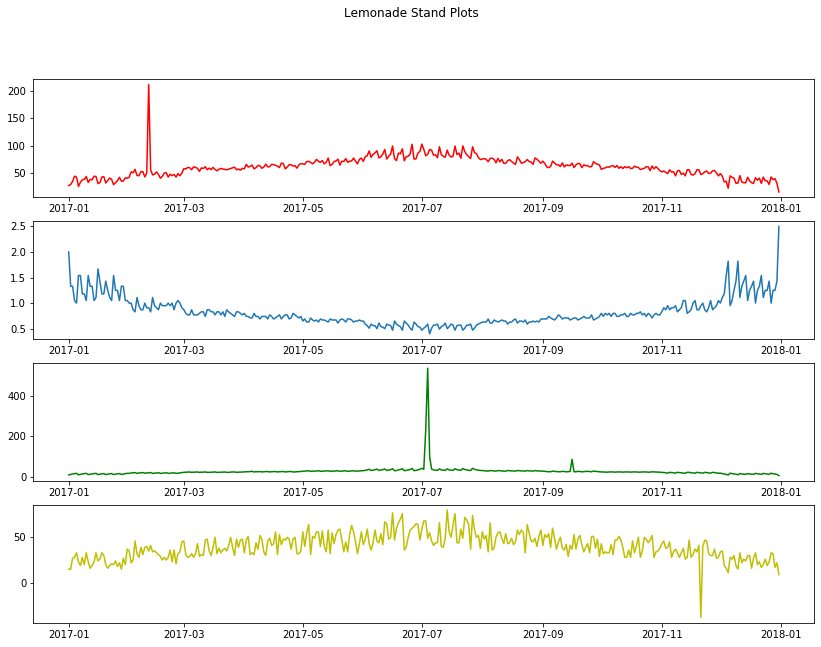

In [106]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(14,10))
fig.suptitle('Lemonade Stand Plots')
ax1.plot(df.Temperature, 'r')
ax2.plot(df.Rainfall)
ax3.plot(df.Sales, 'g')
ax4.plot(df.Flyers, 'y')

plt.show()

## Individual Plots

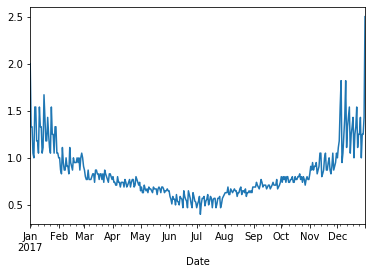

In [82]:
df.Rainfall.plot()

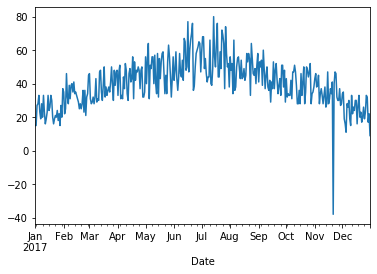

In [83]:
df.Flyers.plot()

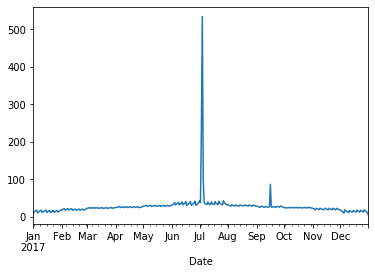

In [84]:
df.Sales.plot()

## Heatmap

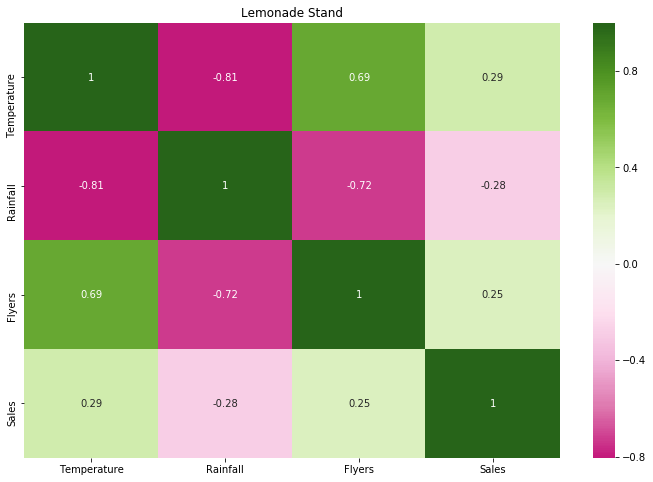

In [183]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_nums.corr(), annot=True, center=0, cmap='PiYG')

plt.title('Lemonade Stand')
plt.show()

In [118]:
# fig, axs = plt.subplots(2, 2, figsize=(12,6),
#                          gridspec_kw={'hspace': 0, 'wspace': 0})
# (ax1, ax2), (ax3, ax4) = axs
# fig.suptitle('Sharing x per column, y per row')
# ax1.plot(df.Temperature)
# ax2.plot(df.Rainfall, 'g')
# ax3.plot(df.Sales, 'r')
# ax4.plot(df.Flyers, 'y')

# for ax in axs.flat:
#     ax.label_outer()

# Normal Distribution Check

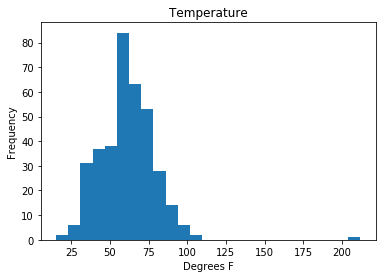

In [153]:
df.Temperature.plot.hist(bins=25)

plt.xlabel('Degrees F')
plt.title('Temperature')

plt.show()

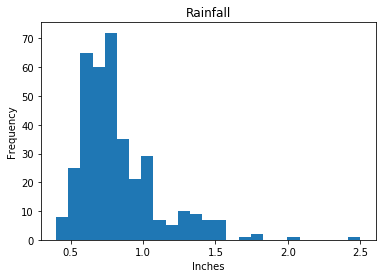

In [149]:
df.Rainfall.plot.hist(bins=25)

plt.xlabel('Inches')
plt.title('Rainfall')
plt.show()

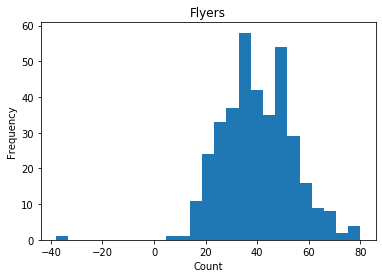

In [148]:
df.Flyers.plot.hist(bins=25)

plt.xlabel('Count')
plt.title('Flyers')
plt.show()

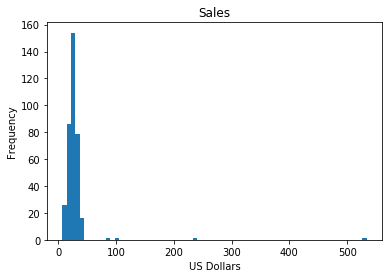

In [147]:
df.Sales.plot.hist(bins=70)

plt.xlabel('US Dollars')
plt.title('Sales')
plt.show()

## Takeaways: Distribution

- Sales is right skewed because of those great sales days in early July, July 4th holiday window.

- Rainfall is right skewed because of the rainy months of December and January.

# Identify Outliers Using Z-scores

## Temperature

In [158]:
# Calculate the z-score 
zscores = pd.Series((df.Temperature - df.Temperature.mean()) / df.Temperature.std())

# Finds all of the observations within two standard deviations
df.Temperature[zscores.abs() > 2]

Date
2017-02-11    212.0
2017-06-16     99.3
2017-06-26    102.6
2017-07-01    102.9
2017-07-10     98.0
2017-07-18     99.3
2017-07-22     99.6
2017-07-27     97.9
2017-12-05     22.0
2017-12-31     15.1
Name: Temperature, dtype: float64

In [157]:
# Finds all of the observations within three standard deviations
df.Temperature[zscores.abs() > 3]

Date
2017-02-11    212.0
Name: Temperature, dtype: float64

## Rainfall

In [159]:
# Calculate the z-score 
zscores = pd.Series((df.Rainfall - df.Rainfall.mean()) / df.Rainfall.std())

# Finds all of the observations within two standard deviations
df.Rainfall[zscores.abs() > 2]

Date
2017-01-01    2.00
2017-01-06    1.54
2017-01-07    1.54
2017-01-11    1.54
2017-01-16    1.67
2017-01-17    1.43
2017-01-20    1.43
2017-01-24    1.54
2017-12-04    1.54
2017-12-05    1.82
2017-12-09    1.43
2017-12-10    1.82
2017-12-13    1.43
2017-12-14    1.54
2017-12-18    1.43
2017-12-22    1.54
2017-12-26    1.43
2017-12-30    1.43
2017-12-31    2.50
Name: Rainfall, dtype: float64

In [160]:
# Finds all of the observations within three standard deviations
df.Rainfall[zscores.abs() > 3]

Date
2017-01-01    2.00
2017-01-16    1.67
2017-12-05    1.82
2017-12-10    1.82
2017-12-31    2.50
Name: Rainfall, dtype: float64

## Flyers

In [163]:
# Calculate the z-score 
zscores = pd.Series((df.Flyers - df.Flyers.mean()) / df.Flyers.std())

# Finds all of the observations within two standard deviations
df.Flyers[zscores.abs() > 2]

Date
2017-06-16    77
2017-06-20    70
2017-06-21    76
2017-07-02    68
2017-07-03    68
2017-07-14    80
2017-07-18    76
2017-07-23    72
2017-07-24    69
2017-07-27    74
2017-11-21   -38
2017-12-05    11
2017-12-31     9
Name: Flyers, dtype: int64

In [165]:
# Finds all of the observations within three standard deviations
df.Flyers[zscores.abs() > 3]

Date
2017-11-21   -38
Name: Flyers, dtype: int64

### Drop Flyer Wild Outlier

- Drop the -38 flyer value to normalize the Flyer col

In [177]:
df['Flyers'] = df.Flyers.where(df.Flyers >0, np.nan)

df = df.assign(
    Flyers=df.Flyers.fillna(df.Flyers.rolling(7,min_periods=1,).median()))

In [184]:
df_nums['Flyers'] = df_nums.Flyers.where(df_nums.Flyers >0, np.nan)

df_nums = df_nums.assign(
    Flyers=df_nums.Flyers.fillna(df_nums.Flyers.rolling(7,min_periods=1,).median()))

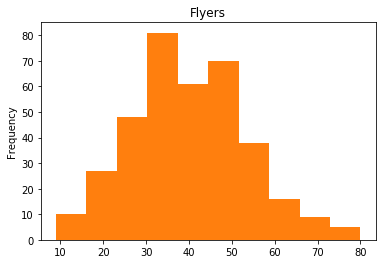

In [197]:
df.Flyers.plot.hist()
df_nums.Flyers.plot.hist()

plt.title('Flyers')
plt.show()

### Drop Temperature Wild Outlier

- Drop the 212 temp to normalize the Temperature col

In [208]:
df['Temperature'] = df.Temperature.where(df.Temperature <150, np.nan)

df = df.assign(
    Temperature=df.Temperature.fillna(df.Temperature.rolling(7,min_periods=1,).median()))

In [209]:
df_nums['Temperature'] = df_nums.Temperature.where(df_nums.Temperature <150, np.nan)

df_nums = df_nums.assign(
    Temperature=df_nums.Temperature.fillna(df_nums.Temperature.rolling(7,min_periods=1,).median()))

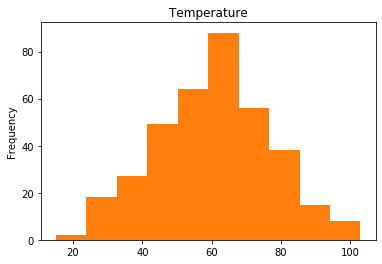

In [210]:
df_nums.Temperature.plot.hist()

df.Temperature.plot.hist()

plt.title('Temperature')
plt.show()

## Sales

In [187]:
# Calculate the z-score 
zscores = pd.Series((df.Sales - df.Sales.mean()) / df.Sales.std())

# Finds all of the observations within two standard deviations
df.Sales[zscores.abs() > 2]

Date
2017-07-03    235
2017-07-04    534
2017-07-05     99
Name: Sales, dtype: int64

In [188]:
# Finds all of the observations within three standard deviations
df.Sales[zscores.abs() > 3]

Date
2017-07-03    235
2017-07-04    534
Name: Sales, dtype: int64

# After Outliers Handled

- I handled only 2 outliers in Temperature and Flyers

- These are the charts run again after handling those two outliers.

## Heatmap 2.0

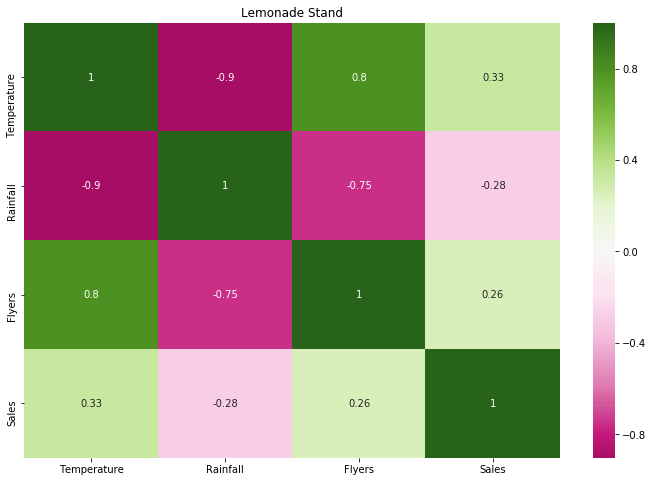

In [211]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_nums.corr(), annot=True, center=0, cmap='PiYG')

plt.title('Lemonade Stand')
plt.show()